# Building Machine Learning Model to predict whether the cancer is benign or malignant on Breast Cancer Wisconsin Data Set !! Part 2

We will follow the below Macine Learning pipeline steps:

    1. Step 1: Define Problem Statement
    2. Step 2: Data Collection
    3. Step 3: Cleaning the Data
    4. Step 4: Data Analysis and Exploration
    5. Step 5: Feature Selection
    6. Step 6: Data Modelling
    7. Step 7: Mode Validation
    8. Step 8: Deployment

#### This is the notebook for step 5 : FeatureSelection

We are using the Breast Cancer Wisconsin dataset available on UCI Machine Learning Repository.

==================================================================================================

### Predicting whether the cancer is benign or malignant

Our objective is to identify which features are most helpful in predicting malignant or benign cancer and to classify whether the breast cancer is benign or malignant

# Part 2 
### Step 5 : Feature Selection Techniques in Predictive modeling using Python
#### A vote based approach to reduce the number of Features in a Dataset with Python

In the following cells, we will select a group of variables, the most predictive ones, to build our machine learning models. Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in. Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features. The selection of relevant features may also get benefitted from the right domain knowledge.

### Why do we need to select variables?

1. For production: Fewer variables mean smaller client input requirements (e.g. customers filling out a form on a website or mobile app), and hence less code for error handling. This reduces the chances of bugs.
2. For model performance: Fewer variables mean simpler, more interpretable, less over-fitted models

In this part we will select feature with different methods that are 

#### 1. Feature selection with correlation 
#### 2. Univariate feature selection (Chi-square)
#### 3. Recursive feature elimination (RFE) with random forest
#### 4. Recursive feature elimination with cross validation(RFECV) with random forest
#### 5. Tree based feature selection with random forest classification
#### 6. L1-based feature selection (LinearSVC)
#### 7. Tree-based feature selection (ExtraTrees)
#### 8. Vote based feature selection

We will use random forest classification in order to train our model and predict.

In [14]:
# importing the libraries
# linear algebra
import numpy as np 
# data processing, CSV file I/O
import pandas as pd 
# data visualization library
import seaborn as sns  
import matplotlib.pyplot as plt
import time
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Muhd-Shahid/Breast-Cancer-Wisconsin/master/data_breast-cancer-wiscons.csv')

In [15]:
# y includes our labels and x includes our features
y = dataset.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = dataset.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 1) Feature selection with correlation

As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean. If you ask how i choose area_mean as a feature to use, well actually there is no correct answer, I just look at swarm plots and area_mean looks like clear for me but we cannot make exact separation among other correlated features without trying. So lets find other correlated features and look accuracy with random forest classifier.

Compactness_mean, concavity_mean and concave points_mean are correlated with each other.Therefore I only choose concavity_mean. Apart from these, radius_se, perimeter_se and area_se are correlated and I only use area_se. radius_worst, perimeter_worst and area_worst are correlated so I use area_worst. Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst. Compactness_se, concavity_se and concave points_se so I use concavity_se. texture_mean and texture_worst are correlated and I use texture_mean. area_worst and area_mean are correlated, I use area_mean.

In [90]:
drop_list_cor = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list_cor,axis = 1 )        # do not modify x, we will use it later 
x_1.head()
selected_feature_corr=x_1.columns
selected_feature_corr

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Actually, I know and you see there is correlation value 0.9 but lets see together what happen if we do not drop it.

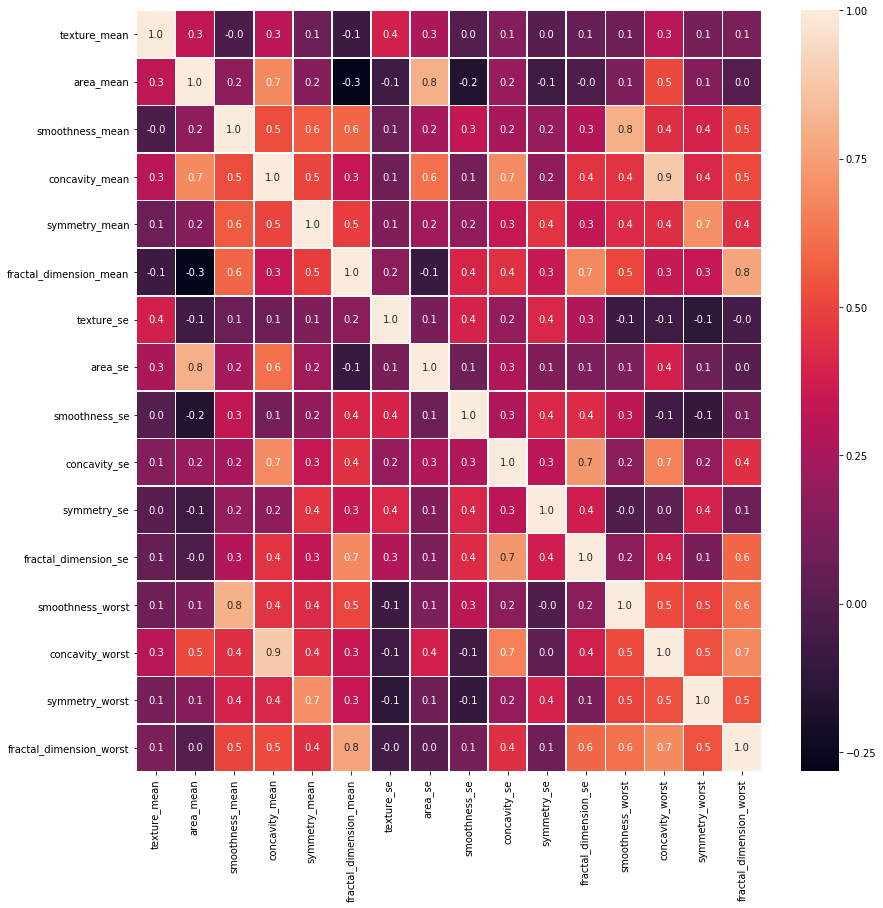

In [17]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Well, we choose our features but did we choose correctly ? Lets use random forest and find accuracy according to chosen features.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is:  0.9532163742690059


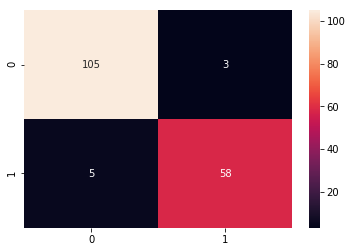

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is almost 95% and as it can be seen in confusion matrix, we make few wrong prediction. Now lets see other feature selection methods to find better results.

#### 2. Univariate feature selection (Chi-square)

In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features. http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. I do not try all combinations but I only choose k = 5 and find best 5 features.

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 10 features
select_feature = SelectKBest(chi2, k=10).fit(x_train, y_train)

In [30]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [31]:
select_feature.get_support()

array([ True,  True, False,  True,  True, False, False,  True, False,
        True, False, False,  True,  True,  True,  True])

In [91]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feature_chi2 = x_train.columns[select_feature.get_support()]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feature_chi2)))
print('Chosen best 10 feature by Chi2:',selected_feature_chi2)

total features: 16
selected features: 10
Chosen best 10 feature by Chi2: Index(['texture_mean', 'area_mean', 'concavity_mean', 'symmetry_mean',
       'area_se', 'concavity_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Checking the accuarcy based on feature selected by chi2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is:  0.9649122807017544


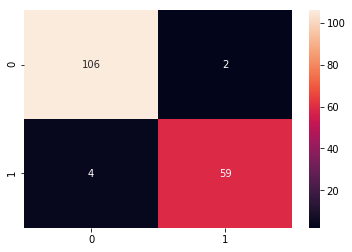

In [92]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Accuracy is above 96% and as it can be seen in confusion matrix, we make few wrong prediction. What we did up to now is that we choose features according to correlation matrix and according to selectkBest method. Although we use 10 features in selectkBest method accuracies look similar. Now lets see other feature selection methods to find better results.

#### 3. Recursive feature elimination (RFE) with random forest

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html Basically, it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features

Like previous method, we will use 10 features. However, which 10 features will we use ? We will choose them with RFE method.

In [93]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=10, step=1)
rfe = rfe.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

In [94]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feature_rfe = x_train.columns[rfe.support_]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feature_rfe)))
print('Chosen best 10 feature by rfe:',x_train.columns[rfe.support_])

total features: 16
selected features: 10
Chosen best 10 feature by rfe: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'area_se', 'concavity_se', 'fractal_dimension_se', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Chosen 10 best features by rfe is texture_mean, area_mean, smoothness_mean, concavity_mean, area_se, concavity_se, fractal_dimension_se, concavity_worst,symmetry_worst,fractal_dimension_worst. They are similar with previous (selectkBest) method. Therefore we do not need to calculate accuracy again. Shortly, we can say that we make good feature selection with rfe and selectkBest methods. However as you can see there is a problem, okey I except we find best 10 feature with two different method and these features are almost same but why it is 10. Maybe if we use best 2 or best 15 feature we will have better accuracy. Therefore lets see how many feature we need to use with rfecv method.

#### 4.  Recursive feature elimination with cross validation(RFECV) with random forest

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html Now we will not only find best features but we also find how many features do we need for best accuracy.

In [95]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

In [96]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feature_rfecv = x_train.columns[rfecv.support_]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feature_rfecv)))
print('Optimal number of features :', rfecv.n_features_)
print('Best features by rfecv:',x_train.columns[rfecv.support_])

total features: 16
selected features: 9
Optimal number of features : 9
Best features by rfecv: Index(['texture_mean', 'area_mean', 'concavity_mean', 'fractal_dimension_mean',
       'area_se', 'concavity_se', 'fractal_dimension_se', 'concavity_worst',
       'symmetry_worst'],
      dtype='object')


Finally, we find best 9 features that are 'texture_mean', 'area_mean', 'concavity_mean', 'fractal_dimension_mean',
       'area_se', 'concavity_se', 'fractal_dimension_se', 'concavity_worst',
       and 'symmetry_worst' for best classification. Lets look at best accuracy with plot.

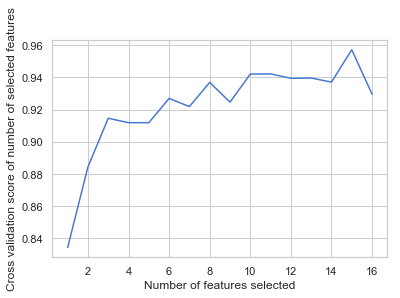

In [71]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Lets look at what we did up to this point. Lets accept that this data is very easy to classification. However, our first purpose is actually not finding good accuracy. Our purpose is learning how to make feature selection and understanding data. Then we are going for the next feature selection method.

#### 5. Tree based feature selection and random forest classification 

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html In random forest classification method there is a featureimportances attributes that is the feature importances (the higher, the more important the feature). !!! To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 1 (0.284735)
2. feature 13 (0.188850)
3. feature 7 (0.113512)
4. feature 3 (0.092554)
5. feature 14 (0.070666)
6. feature 9 (0.065406)
7. feature 0 (0.046058)
8. feature 2 (0.029961)
9. feature 4 (0.019773)
10. feature 5 (0.018029)
11. feature 12 (0.017947)
12. feature 8 (0.016813)
13. feature 11 (0.011659)
14. feature 10 (0.010547)
15. feature 6 (0.008094)
16. feature 15 (0.005397)


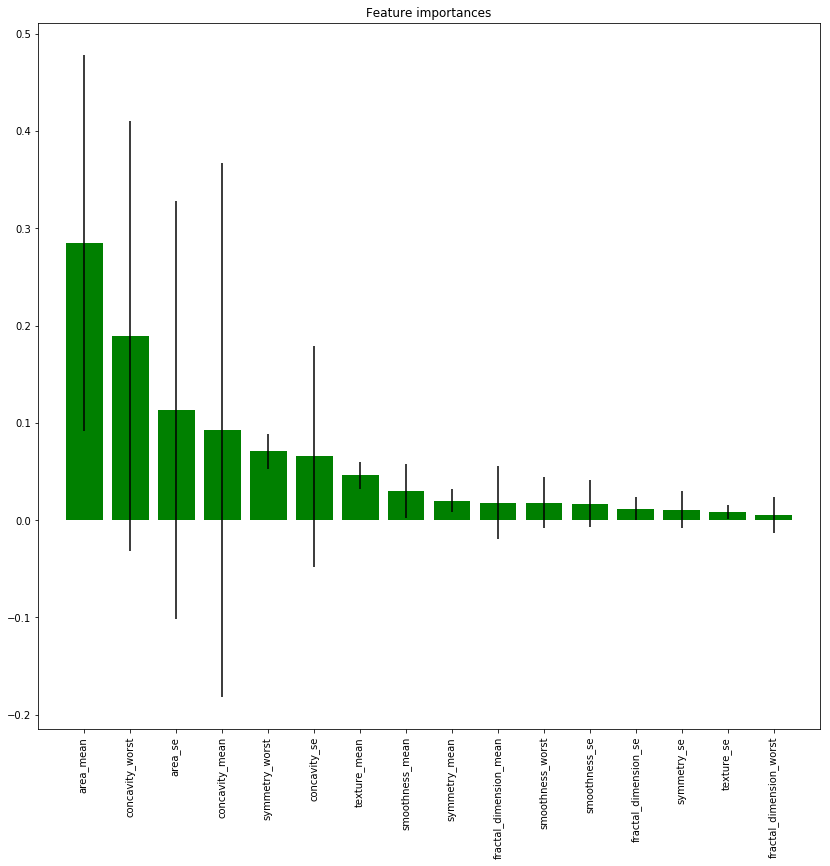

In [98]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

As you can seen in plot above, after 6 best features importance of features decrease. Therefore we can focus these 6 features. 

In [99]:
indices = np.argsort(importances)[::-1]
indices
importances[indices]

array([0.28473451, 0.18884982, 0.11351176, 0.09255446, 0.07066551,
       0.06540586, 0.04605795, 0.02996067, 0.01977335, 0.01802857,
       0.01794744, 0.01681308, 0.01165869, 0.01054704, 0.00809438,
       0.00539692])

In [100]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feature_rf = x_train.columns[indices]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('Chosen optimal features by rf:',selected_feature_rf[1:10])

total features: 16
Chosen optimal features by rf: Index(['concavity_worst', 'area_se', 'concavity_mean', 'symmetry_worst',
       'concavity_se', 'texture_mean', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_mean'],
      dtype='object')


#### 6. L1-based feature selection (LinearSVC)

In [101]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False,max_iter=2000).fit(x_train, y_train) 
model = SelectFromModel(lsvc, prefit=True) 
x_new = model.transform(x_train) 
print(x_train.columns[model.get_support()]) 

Index(['texture_mean', 'area_mean', 'area_se'], dtype='object')


In [102]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feature_lsvc = x_train.columns[model.get_support()]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feature_lsvc)))
print('Best features by lsvc:',x_train.columns[model.get_support()])

total features: 16
selected features: 3
Best features by lsvc: Index(['texture_mean', 'area_mean', 'area_se'], dtype='object')


#### 7. Tree-based feature selection (ExtraTrees)

Feature ranking:
1. feature 3 (0.191527)
2. feature 1 (0.170634)
3. feature 13 (0.169116)
4. feature 7 (0.123651)
5. feature 0 (0.056858)
6. feature 14 (0.039312)
7. feature 12 (0.035452)
8. feature 15 (0.032071)
9. feature 9 (0.030526)
10. feature 5 (0.029508)
11. feature 4 (0.028988)
12. feature 2 (0.022375)
13. feature 11 (0.020679)
14. feature 10 (0.017656)
15. feature 6 (0.016700)
16. feature 8 (0.014947)


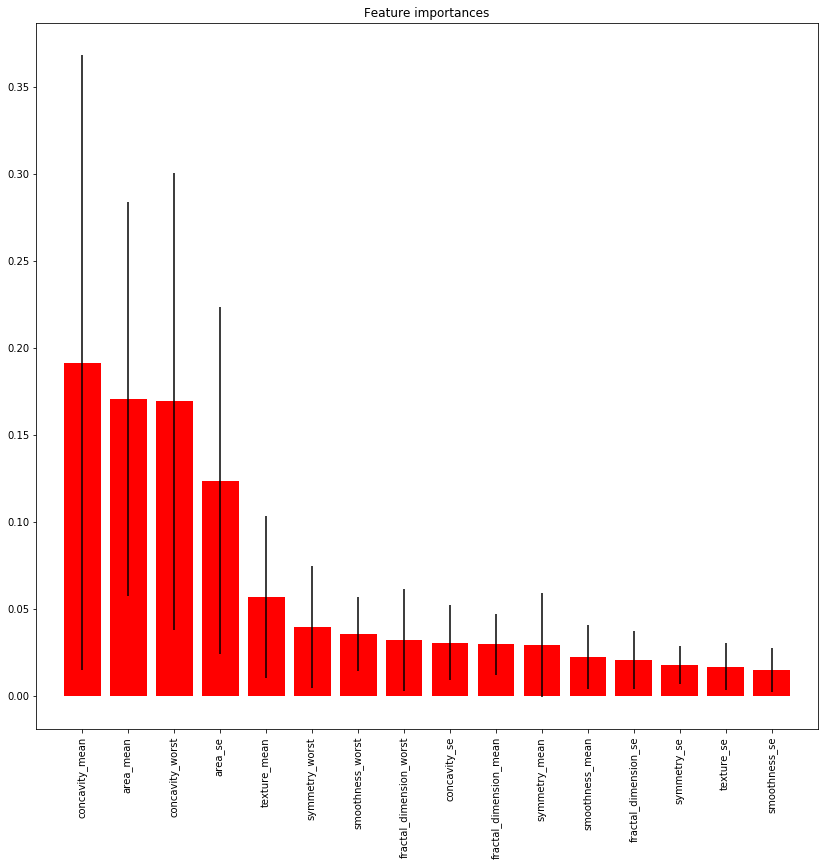

In [103]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
# Build a forest and compute the impurity-based feature importances
clf = ExtraTreesClassifier(n_estimators=32,random_state=0)
clf.fit(x_train, y_train)
clf.feature_importances_ 
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()        

In [104]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feature_extraTrees = x_train.columns[model.get_support()]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feature_extraTrees)))
print('Best features by ExtraTrees:',x_train.columns[model.get_support()])

total features: 16
selected features: 3
Best features by ExtraTrees: Index(['texture_mean', 'area_mean', 'area_se'], dtype='object')


In [74]:
x_train.columns[indices]

Index(['concavity_mean', 'area_mean', 'concavity_worst', 'area_se',
       'texture_mean', 'symmetry_worst', 'smoothness_worst',
       'fractal_dimension_worst', 'concavity_se', 'fractal_dimension_mean',
       'symmetry_mean', 'smoothness_mean', 'fractal_dimension_se',
       'symmetry_se', 'texture_se', 'smoothness_se'],
      dtype='object')

#### 8. Vote based feature selection

#### Feature Extraction using PCA

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html We will use principle component analysis (PCA) for feature extraction. Before PCA, we need to normalize data for better performance of PCA.

Text(0, 0.5, 'explained_variance_ratio_')

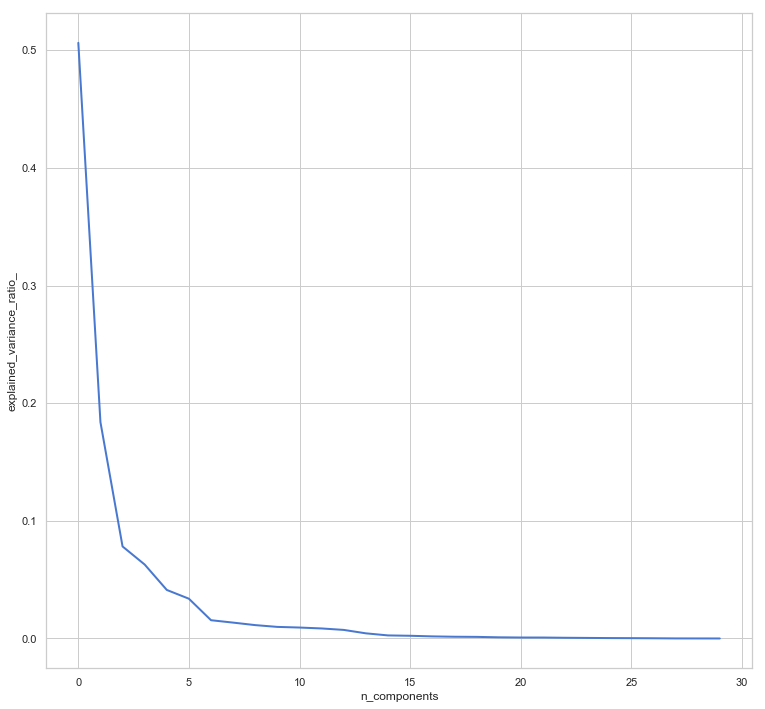

In [73]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

According to variance ration, 3 component can be chosen.

#### I will explore step 6-7 : Mdel Building and Validation in Part 3